In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Cargar archivo

In [16]:
ingresos = pd.read_csv('Internet Ingresos.csv')

print("Vista inicial:")
print(ingresos.head())
print("\nInfo:")
print(ingresos.info())

Vista inicial:
    Año  Trimestre          Ingresos
0  2025          1  $ 671.895.963,18
1  2024          4  $ 697.603.364,84
2  2024          3  $ 541.734.583,50
3  2024          2  $ 442.032.166,69
4  2024          1  $ 346.198.986,13

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        45 non-null     int64 
 1   Trimestre  45 non-null     int64 
 2   Ingresos   45 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


Limpieza de la columna 'Ingresos'

In [17]:
#    (saca símbolo $, puntos de miles y deja coma como decimal)
# ------------------------------
ingresos['Ingresos'] = (
    ingresos['Ingresos']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace('.', '', regex=False)   # elimina separador de miles
    .str.replace(',', '.', regex=False)  # cambia coma decimal por punto
)

ingresos['Ingresos'] = pd.to_numeric(ingresos['Ingresos'], errors='coerce')

print("\nInfo después de limpiar 'Ingresos':")
print(ingresos.info())
print("\nDescripción estadística de 'Ingresos':")
print(ingresos['Ingresos'].describe())


Info después de limpiar 'Ingresos':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        45 non-null     int64  
 1   Trimestre  45 non-null     int64  
 2   Ingresos   45 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB
None

Descripción estadística de 'Ingresos':
count    4.500000e+01
mean     8.915391e+07
std      1.712268e+08
min      2.984054e+06
25%      7.483980e+06
50%      2.165275e+07
75%      6.041950e+07
max      6.976034e+08
Name: Ingresos, dtype: float64


Crear columna 'Periodo'

In [18]:
ingresos['Periodo'] = ingresos['Año'].astype(str) + '-T' + ingresos['Trimestre'].astype(str)
ingresos.head()

,Año,Trimestre,Ingresos,Periodo
0,2025,1,6.718960e+08,2025-T1
1,2024,4,6.976034e+08,2024-T4
2,2024,3,5.417346e+08,2024-T3
3,2024,2,4.420322e+08,2024-T2
4,2024,1,3.461990e+08,2024-T1


Valores faltantes y duplicados

In [20]:
print("\nValores faltantes por columna:")
print(ingresos.isna().sum())

print("\nCantidad de filas duplicadas:")
print(ingresos.duplicated().sum())


Valores faltantes por columna:
Año          0
Trimestre    0
Ingresos     0
Periodo      0
dtype: int64

Cantidad de filas duplicadas:
0


 Detección simple de outliers con IQR

In [21]:
q1 = ingresos['Ingresos'].quantile(0.25)
q3 = ingresos['Ingresos'].quantile(0.75)
iqr = q3 - q1

limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

outliers = ingresos[
    (ingresos['Ingresos'] < limite_inf) |
    (ingresos['Ingresos'] > limite_sup)
]

print("\nPosibles outliers en 'Ingresos':")
print(outliers)


Posibles outliers en 'Ingresos':
    Año  Trimestre      Ingresos  Periodo
0  2025          1  6.718960e+08  2025-T1
1  2024          4  6.976034e+08  2024-T4
2  2024          3  5.417346e+08  2024-T3
3  2024          2  4.420322e+08  2024-T2
4  2024          1  3.461990e+08  2024-T1
5  2023          4  1.673760e+08  2023-T4


Gráfico de evolución de ingresos

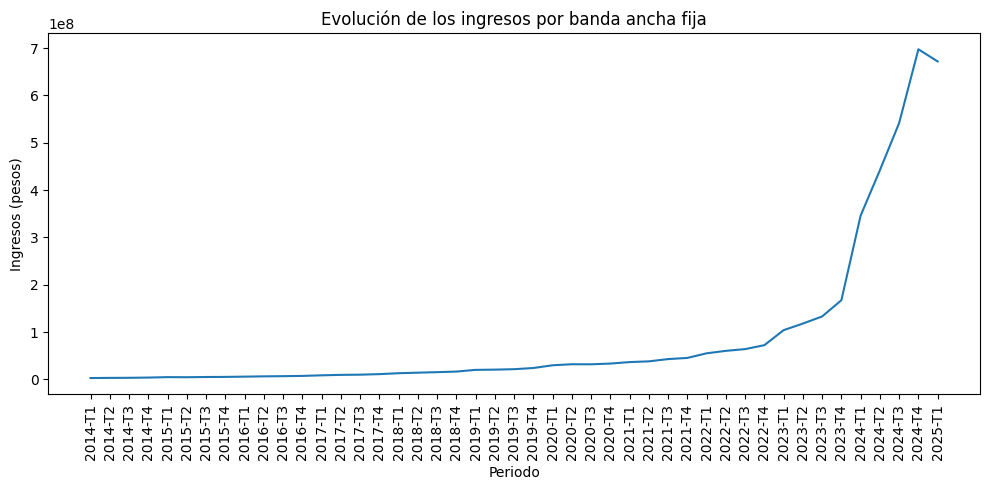

In [22]:
ingresos_orden = ingresos.sort_values(['Año', 'Trimestre'])

plt.figure(figsize=(10,5))
plt.plot(ingresos_orden['Periodo'], ingresos_orden['Ingresos'])
plt.xticks(rotation=90)
plt.title('Evolución de los ingresos por banda ancha fija')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (pesos)')
plt.tight_layout()
plt.show()


Guardar versión limpia

In [26]:
ingresos.to_csv('Internet_Ingresos_CLEAN.csv', index=False, encoding='utf-8')
print("\nArchivo limpio guardado como: Internet_Ingresos_CLEAN.csv")


Archivo limpio guardado como: Internet_Ingresos_CLEAN.csv
